### Parametric Estimation of Bin-based Density Forecast in Surveys 

- Following [Manski et al.(2009)](https://www.tandfonline.com/doi/abs/10.1198/jbes.2009.0003)
- Three cases 
   - case 1. 3+ intervals with positive probabilities, or 2 intervals with positive probabilities but open-ended from either end, to be fitted with a generalized beta distribution
   - case 2. exactly 2 adjacent and close-ended bins positive probabilities, to be fitted with a triangle distribution 
   - case 3. __one or multiple__ adjacent intervals with equal probabilities, to be fitted with a uniform distribution
   - cases excluded for now:
     - nonadjacent bins with positive probabilities with bins with zero probs in between 
     -  only one bin with positive probabilities at either end 
   

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
## import all functions from DensityEst 
## see DensityEst.ipynb for detailed explanations 

from DensityEst import GeneralizedBetaEst,GeneralizedBetaStats,TriangleEst,TriangleStats,UniformEst,UniformStats,SynDensityStat

### Test using made-up data

In [4]:
## test 1: GenBeta Dist
sim_bins= np.array([0,0.2,0.32,0.5,1.6,2])
sim_probs=np.array([0.0,0.2,0.3,0.3,0.2])
para_est = GeneralizedBetaEst(sim_bins,sim_probs)
print(para_est)
if len(para_est) != 0:
    GeneralizedBetaStats(para_est[0],
                        para_est[1],
                        para_est[2],
                        para_est[3])
else:
    print('no estimation')

lower bound is 0.2
upper bound is 2.0
4-parameter beta
[1.02524841 1.60998823 0.21046735 1.01984962]


In [5]:
## test 2: Triangle Dist
sim_bins2 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs2=np.array([0,0.2,0.8,0,0])
para_est = TriangleEst(sim_bins2,sim_probs2)
print(para_est)
TriangleStats(para_est['lb'],
              para_est['ub'], 
              para_est['mode'])

There are two bins with positive probs
The two intervals are adjacent and not open-ended
{'lb': 0.1743769410125095, 'ub': 0.5, 'height': 6.142071161111579, 'mode': 0.1743769410125095}


{'mean': 0.3371884705062548,
 'variance': 0.004417932356015445,
 'std': 0.0664675285836283,
 'iqr1090': 0.3504556494749763,
 'skewness': 0,
 'kurtosis': -0.6}

In [6]:
## test 3: Uniform Dist with one interval
sim_bins3 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs3 = np.array([0,0,1,0,0])
para_est= UniformEst(sim_bins3,sim_probs3)
print(para_est)
UniformStats(para_est['lb'],para_est['ub']) 

length pos bins is 1
{'lb': 0.32, 'ub': 0.5}


{'mean': 0.41000000000000003,
 'variance': 0.0026999999999999997,
 'std': 0.05196152422706632,
 'iqr1090': 0.14399999999999996,
 'skewness': 0,
 'kurtosis': -0.8333333333333334}

In [7]:
## test 4: Uniform Dist with multiple adjacent bins with same probabilities 
sim_bins4 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs4=np.array([0.2,0.2,0.2,0.2,0.2])
para_est= UniformEst(sim_bins4,
                     sim_probs4)
print(para_est)
UniformStats(para_est['lb'],
             para_est['ub']) 

length of pos bins is > 1
{'lb': 0.0, 'ub': 1.2}


{'mean': 0.6,
 'variance': 0.12,
 'std': 0.34641016151377546,
 'iqr1090': nan,
 'skewness': 0,
 'kurtosis': -0.8333333333333334}

In [8]:
## test 5: Uniform Dist with multiple non-adjacent bins with equal probabilities
## totally excluded from current estimation 

sim_bins5 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs5= np.array([0,0.5,0,0.5,0])
para_est = UniformEst(sim_bins5,
                     sim_probs5)
print(para_est)
UniformStats(para_est['lb'],
             para_est['ub']) 

{'lb': nan, 'ub': nan}


{'mean': nan,
 'variance': nan,
 'std': nan,
 'iqr1090': nan,
 'skewness': nan,
 'kurtosis': nan}

### Test with simulated data from known distribution 
- we simulate data from a true beta distribution with known parameters
- then we estimate the parameters with our module and see how close it is with the true parameters 

lower bound is 5.59974302608262e-09
upper bound is 0.999933054434009
4-parameter beta
Estimated parameters [0.44716123 0.59687788 0.02214507 0.96681799]


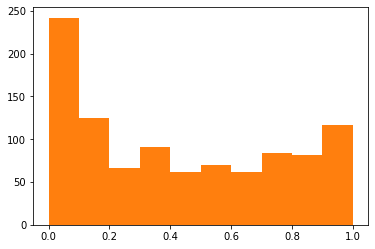

In [9]:
## simulate a generalized distribution
sim_n=1000
true_alpha,true_beta,true_loc,true_scale=0.5,0.7,0.0,1.0

sim_data = beta.rvs(true_alpha,
                    true_beta,
                    loc= true_loc,
                    scale=true_scale,
                    size=sim_n)

sim_bins2=plt.hist(sim_data)[1]
sim_probs2=plt.hist(sim_data)[0]/sim_n

sim_est = GeneralizedBetaEst(sim_bins2,
                           sim_probs2)
print('Estimated parameters',sim_est)

In [10]:
print('Estimated moments:',GeneralizedBetaStats(sim_est[0],
                          sim_est[1],
                          sim_est[2],
                          sim_est[3]))

print('True simulated moments:',
      np.mean(sim_data),
     np.std(sim_data)**2,
     np.std(sim_data)
     )

Estimated moments: {'mean': array(0.42674783), 'variance': array(0.10690298), 'std': 0.3269602144620644, 'iqr1090': 0.8070520519218526, 'skewness': array(0.27221977), 'kurtosis': array(-1.39999601)}
True simulated moments: 0.42631295016322623 0.11148069527544542 0.33388724934541214


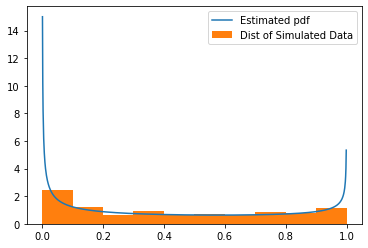

In [11]:
## plot the estimated generalized beta versus the histogram of simulated data drawn from a true beta distribution 
sim_x = np.linspace(true_loc,true_loc+true_scale,sim_n)
sim_pdf=beta.pdf(sim_x,sim_est[0],sim_est[1],loc=true_loc,scale=true_scale)
plt.plot(sim_x,sim_pdf,label='Estimated pdf')
plt.hist(sim_data,density=True,label='Dist of Simulated Data')
plt.legend(loc=0)

In [12]:
## testing the synthesized estimator function using an arbitrary example created above
print(SynDensityStat(sim_bins2,sim_probs2)['variance'])
print(SynDensityStat(sim_bins2,sim_probs2)['iqr1090'])

probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 5.59974302608262e-09
upper bound is 0.999933054434009
4-parameter beta
0.10690298184107916
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 5.59974302608262e-09
upper bound is 0.999933054434009
4-parameter beta
0.8070520519218526


### Estimation with real sample data (from SPF)

In [13]:
### loading probabilistic data  
sample_data =pd.read_stata('../data/sample_data.dta')   
## this is the quarterly SPF forecast on 1-year ahead core inflation 

In [14]:
sample_data.tail()

,index,date,year,quarter,ID,PRCCPI1,PRCCPI2,PRCCPI3,PRCCPI4,PRCCPI5,PRCCPI6,PRCCPI7,PRCCPI8,PRCCPI9,PRCCPI10
2088,2088,2019-01-01,2019.0,1.0,583.0,0.00,0.00,0.00,0.0,70.00,30.00,0.00,0.00,0.00,0.00
2089,2089,2019-01-01,2019.0,1.0,584.0,0.00,1.30,11.50,36.4,38.00,11.50,1.30,0.00,0.00,0.00
2090,2090,2019-01-01,2019.0,1.0,585.0,0.00,0.00,0.00,10.0,60.00,30.00,0.00,0.00,0.00,0.00
2091,2091,2019-01-01,2019.0,1.0,586.0,0.07,0.87,5.12,16.2,27.78,28.22,15.72,5.23,0.71,0.08
2092,2092,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## survey-specific parameters 
nobs=len(sample_data)
sample_bins=np.array([-10,0,0.5,1,1.5,2,2.5,3,3.5,4,10])
print("There are "+str(len(sample_bins)-1)+" bins in the sample data")

There are 10 bins in the sample data


In [ ]:
##############################################
### attention: the estimation happens here!!!!!
###################################################


## creating positions 
index  = sample_data.index

columns=['Mean',
         'Var', 
         'Std',
         'Iqr1090']

sample_moment_est = pd.DataFrame(index=index,
                                 columns=columns)

## Invoking the estimation

for i in range(nobs):
    print(i)
    ## take the probabilities (flip to the right order, normalized to 0-1)
    PRCCPI_y0 = np.flip(np.array([sample_data.iloc[i,:]['PRCCPI'+str(n)]/100 for n in range(1,11)]))
    print(PRCCPI_y0)
    if not np.isnan(PRCCPI_y0).all():
        stats_est=SynDensityStat(sample_bins,PRCCPI_y0)
        if stats_est is not None and len(stats_est)>0:
            sample_moment_est['Mean'][i]= stats_est['mean']
            print(stats_est['mean'])
            sample_moment_est['Var'][i]=stats_est['variance']
            print(stats_est['variance'])
            sample_moment_est['Std'][i]=stats_est['std']
            print(stats_est['std'])
            sample_moment_est['Iqr1090'][i]=stats_est['iqr1090']
            print(stats_est['iqr1090'])           

0
[0.  0.  0.  0.  0.  0.4 0.4 0.2 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.748726168168818
1
[nan nan nan nan nan nan nan nan nan nan]
2
[nan nan nan nan nan nan nan nan nan nan]
3
[0.  0.  0.  0.  0.  0.2 0.7 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5292669235082463
4
[0.   0.   0.   0.02 0.2  0.45 0.3  0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7881011281408208
0.053449323122310016
0.2311910965463636
0.541750211633

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2907937724412806
0.09529027682516018
0.3086912321805726
0.3420665584996288
8
[0.   0.   0.   0.   0.05 0.05 0.4  0.4  0.1  0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.096205121287884
0.023795986787850616
0.15425947876176238
0.540616788672823
9
[nan nan nan nan nan nan nan nan nan nan]
10
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6994115201543163
11
[0.  0.  0.  0.  0.1 0.6 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.10696093464080632
0.32704882608076474
0.701711553738503
36
[0.   0.   0.   0.   0.   0.25 0.65 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5600220134373728
37
[0.   0.   0.   0.   0.05 0.15 0.6  0.2  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.8110644256805244
0.0051858824736876604
0.07201307154737716
0.5090376799230265
38
[0.   0.   0.   0.01 0.07 0.28 0.42 0.18 0.03 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 1.0
upper bound is 10.0
4-parameter beta
2.656000957211414
0.203273290

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.4991465400721107
0.3218255338111153
0.5672966894060949
0.2764995529125854
45
[0.  0.  0.  0.1 0.4 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
46
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6994115201543163
47
[nan nan nan nan nan nan nan nan nan nan]
48
[0.   0.   0.   0.   0.15 0.6  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.101324381908907
0.22514822179959557
0.4744978627977112
0.27961444977418004
53
[nan nan nan nan nan nan nan nan nan nan]
54
[0.  0.  0.  0.  0.  0.3 0.6 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5888360269615965
55
[0.   0.   0.   0.02 0.1  0.5  0.35 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.8345055953562528
0.03819448694659744
0.19543409873048623
0.4675424480446291
56
[0.   0.   0.   0.   0.3  0.65 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.6034628132104296
0.49236964022184554
0.7016905587378567
0.280931274182456
70
[0.   0.   0.   0.   0.14 0.5  0.33 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7194179076711995
0.006939739277850233
0.08330509755021137
0.5771843907220413
71
[nan nan nan nan nan nan nan nan nan nan]
72
[0.   0.   0.02 0.05 0.08 0.4  0.2  0.15 0.08 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.5
upper bound is 10.0
4-parameter beta
2.5891665303153797
0.34862825854721136
0.5904475070209132
0.7571379422706956
73
[0.   0.   0.   0.1  0.25 0.35 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.724909826639673
0.08990629487437346
0.29984378411828627
0.6633667472535882
74
[0.   0.   0.   0.   0.05 0.75 0.2  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4669026380296327
75
[nan nan nan nan nan nan nan nan nan nan]
76
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6214060894855373
77
[0.  0.  0.  0.  0.  0.3 0.5 0.2 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.693863184315118
78
[0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.656000957211414
0.20327329035106648
0.45085839279208995
0.3518224274040172
91
[nan nan nan nan nan nan nan nan nan nan]
92
[0.   0.   0.   0.   0.25 0.4  0.35 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.7604043818962973
93
[0.   0.   0.   0.   0.05 0.2  0.45 0.25 0.05 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.0116084808004926
0.02704220657569112
0.16444514761977966
0.571839421745759
94
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.306683061859817
0.27609738862407185
0.5254497013264655
0.28433732696391234
97
[0.  0.  0.  0.  0.1 0.4 0.4 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7499962268193399
0.008709952695104571
0.09332712732697054
0.6315261582750604
98
[0.   0.   0.   0.   0.35 0.5  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6759088004391584
99
[0.   0.05 0.05 0.28 0.25 0.22 0.07 0.06 0.02 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 4.0
2-parameter beta
1.7790737149487108
0.4

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2623607998622397
0.09696665485809398
0.3113946930474153
0.33280025495309784
109
[0.   0.   0.   0.   0.05 0.4  0.45 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.761527404987429
0.007139278816471712
0.08449425315648226
0.5845253884790513
110
[nan nan nan nan nan nan nan nan nan nan]
111
[nan nan nan nan nan nan nan nan nan nan]
112
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6415194206955972
113
[0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins wi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.5293246172314089
139
[nan nan nan nan nan nan nan nan nan nan]
140
[nan nan nan nan nan nan nan nan nan nan]
141
[0.   0.   0.   0.1  0.35 0.45 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5168397608549768
0.034087494605479746
0.1846279897672066
0.6263079827961848
142
[0.   0.   0.   0.   0.08 0.45 0.4  0.07 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7443015362514496
0.007147258578680057
0.08454146070822326
0.5848770881599354
143
[0.  0.  0.  0.  0.1 0.6 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins w

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2369655626806653
0.28522555406700584
0.5340651215601013
0.3050683081207454
146
[0.   0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7499998669772294
0.005744917498255961
0.07579523400752822
0.5342835206544722
147
[0.   0.   0.   0.   0.35 0.5  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6759088004391584
148
[nan nan nan nan nan nan nan nan nan nan]
149
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
180
[0.  0.  0.  0.  0.1 0.2 0.4 0.2 0.1 0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.0000044922351212
0.04103732571148541
0.2025767156202445
0.6695643993193545
181
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
182
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side? 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.4237574442763368
0.2630209153968536
0.5128556477185892
0.09785339538684656
187
[nan nan nan nan nan nan nan nan nan nan]
188
[0.   0.   0.   0.   0.1  0.65 0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5597696610323175
189
[0.   0.   0.   0.   0.05 0.5  0.4  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7416285484381646
0.005547081244935919
0.07447873015120438
0.5262960190627273
190
[0.   0.   0.   0.   0.03 0.65 0.3  0.02 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.061609381053838
0.48506401931747983
0.6964653755338307
0.17175482296977662
200
[0.   0.   0.   0.   0.   0.4  0.55 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5577224660088307
201
[nan nan nan nan nan nan nan nan nan nan]
202
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339544588
0.022979669993023845
0.15159046801505643
0.5342835206544722
203
[0.   0.   0.   0.   0.25 0.4  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.3740237495865815
0.6429319817355573
0.8018303946194341
0.2772434529804811
209
[0.   0.   0.   0.05 0.2  0.5  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7500016969326988
0.050152189979759565
0.22394684632688974
0.5273712571713349
210
[0.   0.   0.   0.05 0.25 0.4  0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499971860092172
0.07123791361294585
0.2669043154633245
0.6089664436922957
211
[0.   0.   0.   0.01 0.08 0.38 0.43 0.08 0.02 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.752051521391718
0.22964754179840816
0.47921554836879837
0.5952726155668303
215
[0.   0.   0.05 0.1  0.5  0.2  0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.66320150195894
0.13594693391622137
0.36870982346042985
0.5216765430063093
216
[0.  0.  0.  0.  0.3 0.5 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693863184315118
217
[0.   0.   0.   0.05 0.55 0.4  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.306817889959215
0.006

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.2166648474216464
0.5967326267701352
0.7724847097322608
0.31754645868209375
243
[nan nan nan nan nan nan nan nan nan nan]
244
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
245
[0.   0.   0.   0.05 0.2  0.6  0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7190768041138988
0.030161885111888886
0.17367177407940787
0.420137015316574
246
[0.   0.   0.05 0.2  0.35 0.3  0.05 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.4581090489892826
257
[nan nan nan nan nan nan nan nan nan nan]
258
[nan nan nan nan nan nan nan nan nan nan]
259
[0.   0.   0.   0.05 0.2  0.45 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7674127212007393
0.06084496479530502
0.24666772142966947
0.571839421745759
260
[nan nan nan nan nan nan nan nan nan nan]
261
[0.   0.   0.   0.02 0.06 0.48 0.38 0.05 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 4.0
2-parameter beta
1.9694991189580449
0.048627419840406444
0.22051625754217408
0.40153867806416405
262
[0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.9]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bin

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.935968806675982
0.11701102164021233
0.3420687381802265
0.537816876675731
272
[nan nan nan nan nan nan nan nan nan nan]
273
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
274
[nan nan nan nan nan nan nan nan nan nan]
275
[0.0072 0.0144 0.0288 0.0576 0.1153 0.2306 0.2767 0.1383 0.0691 0.0615]
probs do not sum to 1
nan
nan
nan
nan
276
[0.   0.   0.   0.   0.1  0.2  0.2  0.3  0.15 0.05]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 1.5
upper bound is 10.0
4-parameter beta
2.9202616630075937
0.43990820761062377
0.6632557633451999
0.6949360243077267
277
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.244653045149545
0.40930276958958306
0.6397677465999541
0.37413573889405405
289
[0.  0.  0.  0.  0.1 0.7 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
290
[0.   0.   0.   0.   0.05 0.55 0.4  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5582714868792251
291
[0.   0.   0.02 0.02 0.04 0.07 0.22 0.24 0.23 0.16]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.5
upper bound is 10.0
4-parameter beta


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.2166648474216464
0.5967326267701352
0.7724847097322608
0.31754645868209375
292
[nan nan nan nan nan nan nan nan nan nan]
293
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.08333333333333333
0.28867513459481287
nan
294
[0.0025 0.0175 0.03   0.07   0.2    0.4    0.2    0.05   0.0175 0.0125]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.191013212274015
0.31141296902162746
0.5580438773265302
0.24553094757811156
295
[0.   0.   0.   0.05 0.1  0.5  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower boun

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.588781951437435
0.7914687065466721
0.8896452700636767
0.40037504349906683
302
[0.   0.   0.   0.   0.   0.05 0.75 0.2  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.4669026380296327
303
[0.   0.   0.   0.   0.03 0.4  0.5  0.07 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.763435776789326
0.00559278269973174
0.07478490957226425
0.5280803178936591
304
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.36976829720295157
318
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
319
[0.   0.   0.   0.05 0.2  0.5  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7500016969326988
0.050152189979759565
0.22394684632688974
0.5273712571713349
320
[0.   0.   0.   0.05 0.25 0.4  0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499971860092172
0.07123791361294585
0.2669043154633245
0.60896

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.101455716705529
0.23350590810342237
0.4832244903804259
0.4367367182485324
330
[0.   0.   0.   0.   0.05 0.65 0.3  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.514237529489028
331
[nan nan nan nan nan nan nan nan nan nan]
332
[0.  0.  0.  0.  0.1 0.7 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
333
[0.   0.   0.   0.   0.   0.55 0.35 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.706490724

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2924014480561334
0.4193324439121567
0.6475588343248486
0.34166474851869855
336
[0.   0.   0.   0.   0.15 0.8  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.44032077170098854
337
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.4522542485937366
0.03408898422851436
0.1846320238434123
nan
338
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.08333333333333333
0.28867513459481287
nan
339
[0.0005 0.002  0.0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.5168397608549768
0.034087494605479746
0.1846279897672066
0.6263079827961848
343
[0.   0.01 0.05 0.05 0.1  0.52 0.26 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
2.262872518070299
0.14585164767279662
0.38190528625929837
0.39621525130926183
344
[0.   0.   0.   0.   0.1  0.65 0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5597696610323175
345
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
n

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.494648910830971
0.25365780987254716
0.5036445272933552
0.3587369220878275
348
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.36976829720295157
349
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6214060894855373
350
[0.   0.   0.   0.   0.15 0.6  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6138116715229348
351
[0.   0.   0.   0.1  0.3  0.35 0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.1754777509528376
0.30463942070498534
0.5519415011620211
0.2287444656877532
386
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
387
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
388
[nan nan nan nan nan nan nan nan nan nan]
389
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.0833

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4289135315690822
0.18761237144546178
0.43314243782555156
0.30209862246873187
402
[0.35 0.3  0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.3435875537158001
0.33843567223146037
0.5817522429965014
0.6569644733474863
403
[nan nan nan nan nan nan nan nan nan nan]
404
[0.1  0.25 0.4  0.15 0.05 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
0.6375472343892882
0.1851566819503186
0.43029836387130105
0.7183270441580649
405
[nan nan nan nan nan nan nan nan nan nan]
406
[0.   0.02 0.48 0.46 0.03 0.01 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there ope

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.6085827350656778
0.3142609670303297
0.5605898385007791
0.36142906427442945
410
[0.   0.   0.25 0.55 0.2  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9834556527419772
0.0393273587142528
0.19831126723979353
0.6597041857862075
411
[nan nan nan nan nan nan nan nan nan nan]
412
[0.   0.   0.35 0.6  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9026015666684524
0.023370115009807197
0.152872872053243
0.5364864664057033
413
[0.   0.02 0.04 0.07 0.12 0.4  0.15 0.1  0.06 0.04]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.37559492773984
0.5412524331119292
0.7356986020864313
0.2316546562883454
414
[0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.0, 'ub': 2.0}
1.5
0.08333333333333333
0.28867513459481287
nan
415
[0.   0.   0.   0.05 0.3  0.3  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499993378543128
0.08799491677220259
0.29663937158139103
0.6585084799723168
416
[0.1  0.2  0.25 0.35 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.8257791258877032
0.300

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7355762255746512
1.5373219723242146
1.2398878869979393
0.3119436608229164
431
[0.05 0.45 0.45 0.05 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 1.5
4-parameter beta
0.46863173085231913
0.0672985847001126
0.259419707617044
0.7347317810202861
432
[0.   0.   0.05 0.55 0.4  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.1136357799184302
0.025793106137658832
0.16060232295225008
0.5582714868792251
433
[0.25 0.25 0.5  0.   0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2662680997838787
0.008088950728218233
0.08993859420859453
0.6138116715229348
445
[0.   0.   0.   0.   0.15 0.35 0.35 0.1  0.05 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
1.9063337890077157
0.034533071991558965
0.18583076169342622
0.6269214960295177
446
[nan nan nan nan nan nan nan nan nan nan]
447
[0.01 0.01 0.05 0.35 0.5  0.05 0.01 0.01 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 4.0
4-parameter beta
1.5491291585550513
0.11332573643628772
0.3366388813495668
0.7165465573584143
448
[0.   0.05 0.3  0.35 0.25 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4272081302382071
0.41536042393634925
0.6444846188516443
0.26160675584654514
464
[0.01 0.03 0.3  0.55 0.07 0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.1183122902024842
0.10106922017095095
0.31791385652555465
0.7092377991255824
465
[0.  0.  0.2 0.6 0.2 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9999953602797917
0.03337473857942376
0.18268754358035405
0.6214060894855373
466
[0.  0.  0.1 0.7 0.2 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2486468564601596
0.5005869557723188
0.7075216998596713
0.3525221389028871
478
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  True
Only one interval with positive probs
length pos bins is 1
{'lb': -10.0, 'ub': 0.0}
-5.0
8.333333333333334
2.886751345948129
nan
479
[0.03 0.4  0.55 0.02 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 1.5
4-parameter beta
0.5207957332735152
0.06607027837144087
0.2570413942761766
0.7316704527352247
480
[0.   0.1  0.2  0.3  0.25 0.1  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.34795412460034
0.36994060060

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9352981818874255
0.23842569201968347
0.48828853357383223
0.19826077704211598
492
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
493
[0.  0.  0.1 0.2 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.3777378065908314
0.08071926898307569
0.2841113672190461
0.6362254957769365
494
[0.  0.  0.  0.2 0.6 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249997680139

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.9825917522283371
0.16552810127353879
0.4068514486560651
0.6714442238153304
523
[0.02 0.08 0.17 0.43 0.25 0.03 0.01 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.5
4-parameter beta
1.1777858021448275
0.187038938430524
0.4324799861618153
0.6969687817435795
524
[nan nan nan nan nan nan nan nan nan nan]
525
[nan nan nan nan nan nan nan nan nan nan]
526
[0.02 0.03 0.1  0.1  0.1  0.25 0.2  0.1  0.06 0.04]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.199519167969494
1.0237527015174075
1.0118066522401439
0.28127542208721434
527
[0.   0.   0.   0.   0.05 0.95 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-en

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.9030457980186715
0.5093983906946191
0.7137215077988186
0.4094181533718705
550
[0.  0.  0.  0.2 0.8 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.5477457514062631
0.03408898422851429
0.18463202384341207
nan
551
[0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9999796747611984
0.016198205132265043
0.127272169511897
0.4581090489892826
552
[0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.0, 'ub': 2.0}
1.5
0.08333333333333333
0.288675134

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.6415200777729496
567
[0.  0.  0.1 0.3 0.4 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.3271499236593263
0.1017551284718885
0.3189907968451261
0.6903532060281434
568
[0.  0.  0.3 0.6 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9350847025547706
0.029191100540196385
0.1708540328473296
0.5888360269615965
569
[0.   0.   0.05 0.15 0.25 0.25 0.2  0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.8304180217439774
0.2982520801

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4542607393677507
0.4222557410389361
0.6498120813273143
0.2524736031653968
598
[0.01 0.02 0.05 0.25 0.3  0.25 0.06 0.03 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.817468650429781
0.3939362813538478
0.6276434348846865
0.24293979587121217
599
[0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2499996009316883
0.051704257484303656
0.22738570202258465
0.5342835206544722
600
[0.  0.  0.4 0.6 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacen

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.7414440505010225
0.47363296646170255
0.6882099726549322
0.4195342180637075
604
[0.   0.02 0.08 0.25 0.45 0.12 0.05 0.02 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 4.0
2-parameter beta
1.6608751842234948
0.21761531457666758
0.46649256647525217
0.4224256752375274
605
[0.7 0.  0.3 0.  0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
lower bound is -10.0
upper bound is 1.0
4-parameter beta
-0.19340006795338138
0.08556683752591304
0.2925180977750147
0.746527714625066
606
[0.    0.05  0.125 0.2   0.25  0.2   0.125 0.05  0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2499996009316883
0.051704257484303656
0.22738570202258465
0.5342835206544722
615
[nan nan nan nan nan nan nan nan nan nan]
616
[0.   0.1  0.4  0.35 0.15 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.0
2-parameter beta
1.0174067073214292
0.1655210080213853
0.40684273131197185
0.6714344751013945
617
[0.   0.05 0.05 0.4  0.4  0.05 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.4999940870840316
0.15120805984788288
0.3888548056124328
0.46571412115294647
618
[0.25 0.4  0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least thr

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.3042926706894074
0.40663637194306995
0.6376804622560346
0.25813717322630003
639
[0.02 0.1  0.2  0.4  0.2  0.06 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.0
4-parameter beta
1.2043302978755213
0.291639535219388
0.5400366054439162
0.3097564887132642
640
[0.   0.   0.1  0.75 0.15 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.0169695913258752
0.019372072645494832
0.13918359330572994
0.49614319039820853
641
[0.   0.   0.45 0.55 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
657
[nan nan nan nan nan nan nan nan nan nan]
658
[0.01 0.01 0.3  0.6  0.05 0.01 0.01 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.5
4-parameter beta
1.1283818755204458
0.0825472536663118
0.28731037862616765
0.7040529006885914
659
[0.   0.05 0.4  0.45 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.0
2-parameter beta
1.0461096199497155
0.11422846106354739
0.33797701262592905
0.5845253884790513
660
[nan nan nan nan nan nan nan nan nan nan]
661
[0.09 0.33 0.4  0.12 0.06 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-en

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 0.5, 'ub': 1.5}
1.0
0.08333333333333333
0.28867513459481287
nan
674
[0.  0.3 0.5 0.2 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 1.5
2-parameter beta
0.6990732552596282
0.10312982876583503
0.32113833275682774
0.693863184315118
675
[0.  0.  0.3 0.6 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9350847025547706
0.029191100540196385
0.1708540328473296
0.5888360269615965
676
[0.   0.   0.05 0.55 0.35 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisit

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
693
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.908028921947277
0.027747933524242836
0.1665771098447888
0.9130821484640296
694
[0.  0.  0.1 0.4 0.4 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2499886804580198
0.07838957425594115
0.2799813819809116
0.6315261582750604
695
[nan nan nan nan nan nan nan nan nan nan]
696
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2757039935999712
0.47065222532907536
0.6860409793365666
0.24141379422853743
722
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.908028921947277
0.027747933524242836
0.1665771098447888
0.9130821484640296
723
[0.  0.  0.7 0.3 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.052758056251845
0.050923578125219665
0.22566253150494361
1.1139085627576284
724
[0.  0.  0.6 0.4 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.418724371174623
0.1526572542031759
0.39071377529231793
0.6523141056124705
738
[nan nan nan nan nan nan nan nan nan nan]
739
[nan nan nan nan nan nan nan nan nan nan]
740
[nan nan nan nan nan nan nan nan nan nan]
741
[0.05 0.2  0.4  0.25 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.7606468933344255
0.15320431045854163
0.3914132221304508
0.6994762563055347
742
[0.   0.   0.2  0.45 0.2  0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.1615881603720797
0.11052426053928499
0.33245189206753656
0.7077525232329127
743
[0.   0.01 0.05 0.18 0.3  0.28 0.15 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bin

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.0428145808145861
0.15515340125182792
0.39389516530649105
0.44967166827247834
751
[0.  0.  0.2 0.5 0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.0339485546170837
0.04583340982253831
0.21408738828464022
0.693853397268692
752
[0.  0.  0.  0.6 0.4 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.6801898050140316
0.07710969514083771
0.2776863250879267
1.7070788668911026
753
[0.   0.   0.1  0.15 0.2  0.3  0.15 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-para

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2502249003901418
0.7794899627952058
0.88288728770733
0.369707076077173
772
[0.   0.   0.   0.05 0.4  0.45 0.05 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.6325187202613036
0.04225071177113217
0.20554977930207605
0.4886437963537571
773
[0.08 0.1  0.25 0.25 0.25 0.05 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.0
4-parameter beta
1.0919072900502882
0.45371992367778596
0.6735873541551874
0.5673896214668752
774
[0.   0.   0.   0.   0.1  0.75 0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upp

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.8980722874001015
0.23636998498708722
0.4861789639495802
0.378010729226504
776
[0.   0.   0.35 0.6  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9026015666684524
0.023370115009807197
0.152872872053243
0.5364864664057033
777
[0.02 0.03 0.05 0.1  0.3  0.3  0.1  0.05 0.03 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
778
[nan nan nan nan nan nan nan nan nan nan]
779
[0.01 0.02 0.05 0.4  0.4  0.08 0.01 0.01 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three b

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.283059850380655
0.2529717304532793
0.5029629513724438
0.2833078993171692
781
[0.   0.   0.05 0.5  0.4  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.224885645314494
0.04992373120442327
0.2234361904536131
0.5262960190627273
782
[nan nan nan nan nan nan nan nan nan nan]
783
[0.   0.   0.03 0.5  0.45 0.02 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2352248633528098
0.03775223955746368
0.19429935552508576
0.46542825244891745
784
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with p

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.818116803102386
1.104657512435425
1.0510268847348412
0.44647534435132397
791
[nan nan nan nan nan nan nan nan nan nan]
792
[0.  0.  0.  0.  0.9 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.865618823893566
0.022279520730885682
0.14926325981595634
nan
793
[0.   0.01 0.05 0.48 0.4  0.05 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.4727826116844323
0.10024617291396908
0.31661676031753133
0.38546465846387623
794
[0.  0.  0.  0.2 0.5 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2499976801398958
0.00834368464485594
0.09134377179017703
0.6214060894855373
810
[0.   0.15 0.25 0.3  0.2  0.1  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.5
2-parameter beta
1.1732788342900484
0.3358997357591564
0.5795685772703316
0.7270962789078539
811
[0.   0.   0.   0.05 0.5  0.35 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4889138635943815
0.027908450514210235
0.16705822492236122
0.5792228278037319
812
[0.  0.  0.  0.8 0.  0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
813
[0.   0.   0.   0.15 0.3  0.4  0.15 0.   0.   0.  ]
probs sum up

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
821
[nan nan nan nan nan nan nan nan nan nan]
822
[0.   0.   0.   0.05 0.4  0.35 0.15 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.6601164182093227
0.06650872872434091
0.25789286287980306
0.5919199230466955
823
[0.  0.  0.1 0.5 0.4 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.1000420742430446
0.03684152022361893
0.19194144998832047
0.6415194206955972
824
[0.  0.  0.  0.3 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


827
[0.  0.  0.  0.4 0.6 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.3198101949859684
0.07710969514083776
0.2776863250879268
1.3898862275747814
828
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.9522542485937369
0.034088984228514266
0.184632023843412
nan
829
[0.   0.   0.15 0.25 0.45 0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2991349816518478
0.1023079254353445
0.319856101138222
0.6921440739421246
830
[0.   0.  

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.27473486950649
0.009303917131388681
0.09645681485197757
0.6462211340043473
834
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
835
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
836
[0.  0.  0.  0.2 0.5 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2669742773085417
0.011458352455634577
0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.0963594978810978
0.4772148955269861
0.690807422895112
0.17171802078239629
839
[0.   0.   0.1  0.15 0.2  0.3  0.15 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.7769060613503904
0.3296249668844428
0.5741297474303546
0.7237184534904629
840
[0.  0.  0.  0.1 0.6 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2824554709069578
0.007298035541024185
0.08542854055305045
0.5888445120094459
841
[0.   0.   0.   0.   0.15 0.55 0.3  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
849
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
850
[0.   0.   0.   0.05 0.45 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5062010329556963
0.02901256586521506
0.17033075431411399
0.5883555262015223
851
[0.  0.  0.  0.3 0.2 0.5 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2948022080428774
0.03112883

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



nan
nan
0.7307946346685172
885
[0.   0.   0.   0.   0.15 0.7  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5403038582412389
886
[0.   0.   0.   0.01 0.14 0.75 0.09 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7343639359730354
0.01635634805955861
0.1278919389936622
0.31470681730955163
887
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
888
[0.   0.   0.   0.   0.15 0.85 0. 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.0196188410367677
0.24276138186504
0.49270821168825674
0.24596359679707713
890
[0.   0.   0.   0.01 0.23 0.75 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5591190671603155
0.006885612541392305
0.08297959111367267
0.30650353546272474
891
[0.  0.  0.  0.  0.  0.4 0.5 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.6415200777729496
892
[0.    0.    0.    0.025 0.825 0.15  0.    0.    0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2752076

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.72779388497949
0.2110866666816722
0.4594416901867659
0.4710305351409365
912
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.5, 'ub': 2.5}
2.0
0.08333333333333333
0.28867513459481287
nan
913
[0.   0.   0.2  0.4  0.2  0.15 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.2660056832130127
0.177799658435033
0.4216629678250546
0.682449091025803
914
[0.   0.04 0.11 0.18 0.34 0.18 0.11 0.04 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.749994787718395
0.421899450

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9175859252633969
0.40068643835149853
0.6329979765777285
0.3127042225429918
934
[0.   0.01 0.05 0.23 0.35 0.3  0.05 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7928974723479885
0.24223479236442477
0.492173538870615
0.5006596546626103
935
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6214060894855373
936
[0.    0.    0.025 0.125 0.35  0.35  0.125 0.025 0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.7500033587

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


939
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
940
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
941
[0.0056 0.0184 0.0468 0.1176 0.2088 0.2464 0.1784 0.1008 0.0484 0.0288]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.232140113305194
0.6954640342323735
0.8339448628250992
0.31121208867649935
942
[nan na

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
949
[nan nan nan nan nan nan nan nan nan nan]
950
[0.01 0.01 0.01 0.05 0.2  0.45 0.2  0.05 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.3018790899648343
0.1771380796214403
0.42087774902154224
0.416444631361191
951
[0.  0.  0.  0.1 0.4 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
952
[nan nan nan nan nan nan nan nan nan nan]
953
[0.  0.  0.  0.2 0.3 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2660056832130127
0.177799658435033
0.4216629678250546
0.682449091025803
958
[0.   0.   0.03 0.13 0.29 0.4  0.12 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.7748849039506518
0.15633013049753502
0.39538605248229863
0.5537126100567652
959
[0.01 0.05 0.2  0.3  0.4  0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.3413603515020451
0.23149985001570744
0.48114431308673644
0.7555821460422377
960
[0.   0.   0.   0.   0.25 0.65 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
u

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
989
[nan nan nan nan nan nan nan nan nan nan]
990
[0.01 0.01 0.01 0.05 0.2  0.45 0.2  0.05 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.3018790899648343
0.1771380796214403
0.42087774902154224
0.416444631361191
991
[0.   0.   0.   0.   0.15 0.55 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7094461055041288
0.006359746901629938
0.07974802130228648
0.5563745142463796
992
[0.01 0.06 0.13 0.33 0.21 0.11 0.08 0.04 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least thre

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [16]:
### exporting moments estimates to pkl
data_est = pd.concat([sample_data,sample_moment_est], join='inner', axis=1)
data_est.to_pickle("./DstSampleEst.pkl")
data_pkl = pd.read_pickle('./DstSampleEst.pkl')

In [17]:
## convert all moments to numeric values 

data_pkl['Mean']=pd.to_numeric(data_pkl['Mean'],errors='coerce')   # CPI from y-1 to y
data_pkl['Var']=pd.to_numeric(data_pkl['Var'],errors='coerce')
data_pkl['Std']=pd.to_numeric(data_pkl['Std'],errors='coerce')
data_pkl['Iqr1090']=pd.to_numeric(data_pkl['Iqr1090'],errors='coerce')

In [18]:
data_pkl.tail()

,index,date,year,quarter,ID,PRCCPI1,PRCCPI2,PRCCPI3,PRCCPI4,PRCCPI5,PRCCPI6,PRCCPI7,PRCCPI8,PRCCPI9,PRCCPI10,Mean,Var,Std,Iqr1090
2088,2088,2019-01-01,2019.0,1.0,583.0,0.00,0.00,0.00,0.0,70.00,30.00,0.00,0.00,0.00,0.00,1.947242,0.050924,0.225663,NaN
2089,2089,2019-01-01,2019.0,1.0,584.0,0.00,1.30,11.50,36.4,38.00,11.50,1.30,0.00,0.00,0.00,1.9963468285023733,0.08110989108591005,0.284798,0.506215
2090,2090,2019-01-01,2019.0,1.0,585.0,0.00,0.00,0.00,10.0,60.00,30.00,0.00,0.00,0.00,0.00,nan,nan,NaN,0.588836
2091,2091,2019-01-01,2019.0,1.0,586.0,0.07,0.87,5.12,16.2,27.78,28.22,15.72,5.23,0.71,0.08,2.0036980273451444,0.39912627197588907,0.631764,0.438353
2092,2092,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## export estimates 
data_pkl.to_excel('../data/Dstsample_data.xlsx')

318 missing estimates
305 of which is due to missing data


All nan estimates due to other reasons

158
nan
[0.01 0.01 0.01 0.01 0.1  0.74 0.1  0.01 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 4.0
4-parameter beta
Estimate is None!!!
275
nan
[0.0072 0.0144 0.0288 0.0576 0.1153 0.2306 0.2767 0.1383 0.0691 0.0615]
probs do not sum to 1
nan
324
nan
[0.033 0.041 0.05  0.058 0.066 0.074 0.165 0.248 0.124 0.14 ]
probs do not sum to 1
nan
647
nan
[0.7 0.  0.  0.3 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
lower bound is -10.0
upper bound is 1.5
4-parameter beta
Estimate is None!!!
683
nan
[0.7 0.  0.  0.  0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  T

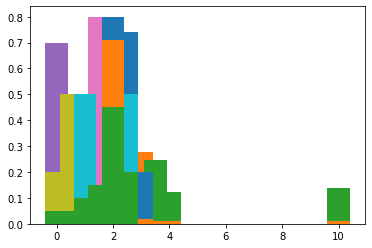

In [20]:
### Robustness checks: focus on NaN estimates (due to missing data or non-convergence)

sim_bins_data = sample_bins
nan_est = data_pkl['Mean'].isna()
missing_data = data_pkl['PRCCPI1'].isna() ## no data to estimate in the first place 

print(str(sum(nan_est))+' missing estimates')
print(str(sum(missing_data))+' of which is due to missing data')

print('\n')
print('All nan estimates due to other reasons\n')
ct=0
figure=plt.plot()
for id in data_pkl.index[(nan_est) & (~missing_data)]:
    print(id)
    print(data_pkl['Mean'][id])
    sim_probs_data= np.flip(np.array([sample_data['PRCCPI'+str(n)][id]/100 for n in range(1,11)]))
    plt.bar(sim_bins_data[1:],sim_probs_data)
    print(sim_probs_data)
    ## do estimation again 
    stats_est=SynDensityStat(sample_bins,
                             sim_probs_data)
    if stats_est is not None:
        print(stats_est['mean'])
    else:
        print('Estimate is None!!!')